<a href="https://colab.research.google.com/github/fhsmartins/MBA/blob/main/Aula03/AULA_14_Meu_primeiro_classificador_Naive_Bayes_Pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AULA 14 - Meu primeiro classificador - Naive Bayes - Prática

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

## Primeiro, vamos carregar nosso conjunto de treinamento.

Dataset com histórico de campanha de marketing.

* Age:  Faixa de idade
* Income: Nível de faixa salarial
* Education: Nível de escolaridade
* Online: Utiliza ou não internet banking
* Family: Tamanho/Categoria de membros da família
* CreditCard: Se possui CD do banco
* Mortage: Se possui ou não hipoteca
* Experience: Nível profissional
* Label: Se aceitou ou não a proposta oferecida

In [ ]:
df_train = pd.read_excel('df_data_train.xlsx')
df_train

,Age,Income,Education,Online,Family,CreditCard,Mortage,Experience,Label
0,30-40,High,Advanced / Professional,Yes,Large,Yes,No,Mid-level,positive
1,30-40,Low,Advanced / Professional,No,Very Small,No,Yes,Mid-level,negative
2,30-40,Medium,Undergrad,No,Large,No,Yes,Mid-level,positive
3,40-50,Low,Graduate,No,Very Small,Yes,Yes,Mid-level,negative
4,30-40,Medium,Graduate,No,Large,Yes,No,Junior,positive
...,...,...,...,...,...,...,...,...,...
995,30-40,Medium,Graduate,No,Large,No,No,Junior,positive
996,30-40,Low,Graduate,Yes,Very Small,Yes,Yes,Junior,negative
997,50-60,Low,Advanced / Professional,No,Very Small,Yes,No,Mid-level,negative
998,>60,Low,Advanced / Professional,Yes,Large,Yes,Yes,Senior,negative


## Uma análise exploratória dos atributos é sempre importante

<Axes: xlabel='Label', ylabel='count'>

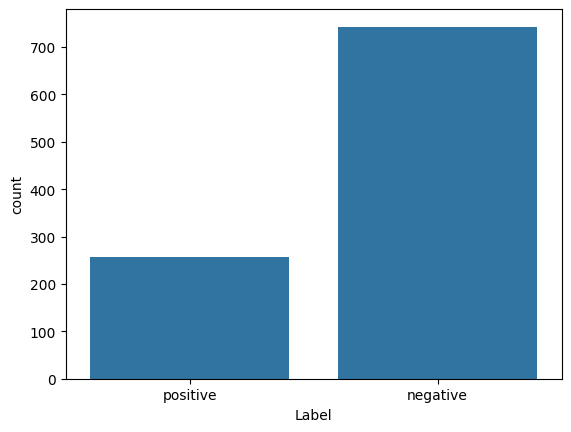

In [ ]:
sns.countplot(data=df_train,x='Label')

<Axes: xlabel='Age', ylabel='count'>

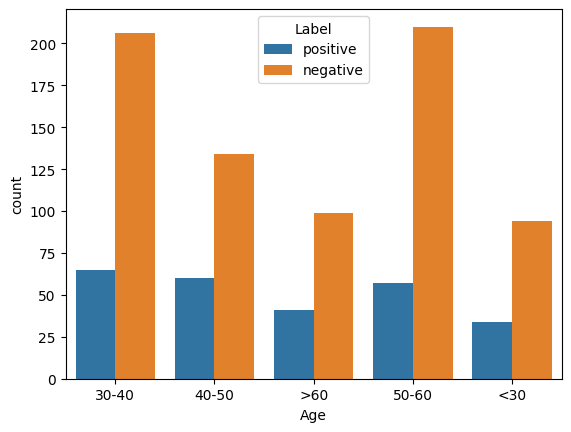

In [ ]:
sns.countplot(data=df_train,x='Age', hue = "Label")

<Axes: xlabel='CreditCard', ylabel='count'>

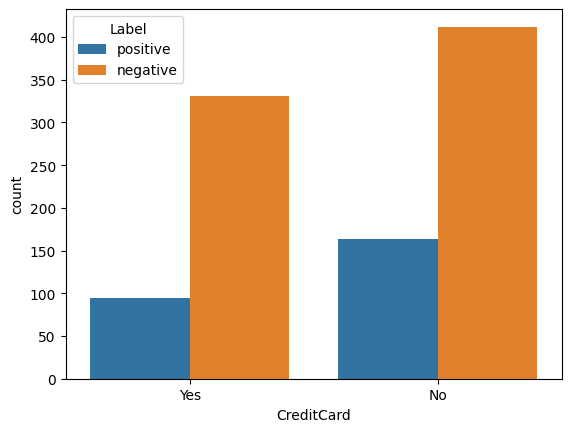

In [ ]:
sns.countplot(data=df_train,x='CreditCard', hue = "Label")

<Axes: xlabel='Education', ylabel='count'>

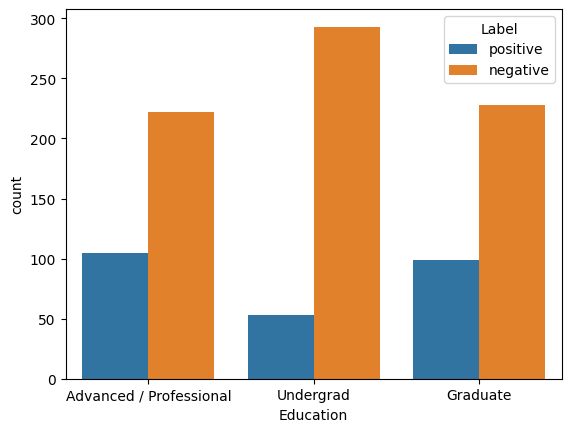

In [ ]:
sns.countplot(data=df_train,x='Education', hue = "Label")

<Axes: xlabel='Income', ylabel='count'>

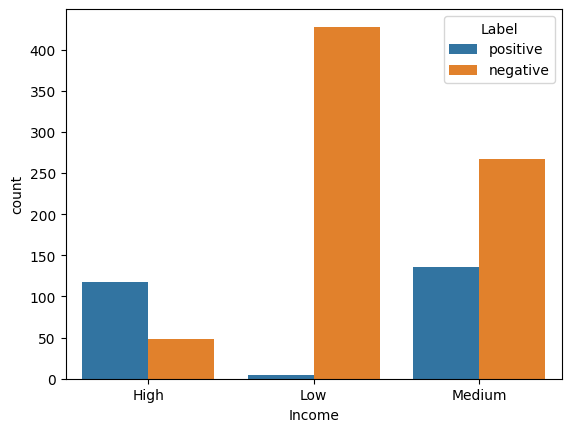

In [ ]:
sns.countplot(data=df_train,x='Income', hue = "Label")

## Vamos preparar a base utilizando a transformação apropriada.

No nosso caso, usaremos o CategoricalNB:
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html

É importante sempre olharmos a documentação do modelo que irá utilizar para entender como os dados devem ser transformados.




In [ ]:
enc_features = OrdinalEncoder()

# filtrando apenas os atributos
X_train = df_train[['Age', 'Income', 'Education', 'Online', 'Family', 'CreditCard','Mortage', 'Experience']]
X_train = enc_features.fit_transform(X_train)
X_train

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 1.],
       [0., 2., 2., ..., 0., 1., 1.],
       ...,
       [2., 1., 0., ..., 1., 0., 1.],
       [4., 1., 0., ..., 1., 1., 2.],
       [3., 2., 1., ..., 0., 0., 0.]])

In [ ]:
enc_features.categories_

[array(['30-40', '40-50', '50-60', '<30', '>60'], dtype=object),
 array(['High', 'Low', 'Medium'], dtype=object),
 array(['Advanced / Professional', 'Graduate', 'Undergrad'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Large', 'Medium', 'Small', 'Very Small'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Junior', 'Mid-level', 'Senior'], dtype=object)]

In [ ]:
enc_label = LabelEncoder()

y_train = enc_label.fit_transform(df_train['Label'])
y_train

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

# Treinando nosso primeiro classificador

In [ ]:
clf = CategoricalNB()
clf.fit(X_train, y_train)

CategoricalNB()

Como estimar a acurácia deste classificador?

### NUNCA ESTIMAR USANDO O PRÓPRIO CONJUNTO DE TREINAMENTO!

In [ ]:
### NUNCA FAZER ISSO, ESTÁ ERRADO!!!

y_pred = clf.predict(X_train) ### predição no próprio conjunto de treinamento??? Erro!
y_true = y_train
print(classification_report(y_true, y_pred, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.86      0.94      0.90       743
    positive       0.77      0.56      0.65       257

    accuracy                           0.84      1000
   macro avg       0.81      0.75      0.77      1000
weighted avg       0.84      0.84      0.83      1000



## Vamos avaliar nosso classificador usando dados ainda não vistos!

Agora vamos ler 400 novas instâncias!

In [ ]:
df_test = pd.read_excel('df_data_test.xlsx')
df_test

,Age,Income,Education,Online,Family,CreditCard,Mortage,Experience,Label
0,<30,Medium,Graduate,No,Large,Yes,No,Junior,positive
1,<30,High,Advanced / Professional,Yes,Medium,No,Yes,Junior,positive
2,30-40,Low,Advanced / Professional,No,Small,No,No,Junior,negative
3,>60,Medium,Graduate,Yes,Small,No,No,Senior,positive
4,50-60,Low,Advanced / Professional,No,Small,Yes,No,Senior,negative
...,...,...,...,...,...,...,...,...,...
395,40-50,High,Undergrad,No,Small,Yes,Yes,Mid-level,negative
396,40-50,Low,Advanced / Professional,Yes,Large,No,No,Mid-level,negative
397,50-60,Low,Graduate,No,Small,Yes,Yes,Mid-level,negative
398,40-50,Low,Advanced / Professional,Yes,Medium,Yes,Yes,Mid-level,negative


### Como é um experimento simulado, nosso conjunto de teste já possui dados rotulados para apoiar a avaliação!

## Preparando o conjunto de teste

In [ ]:
# filtrando apenas os atributos
X_test = df_test[['Age', 'Income', 'Education', 'Online', 'Family', 'CreditCard','Mortage', 'Experience']]

# vamos usar o mesmo enc_features que usamos durante o treinamento!!!
X_test = enc_features.transform(X_test)
X_test

array([[3., 2., 1., ..., 1., 0., 0.],
       [3., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [2., 1., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 0., 1., 1.]])

## Gerando as predições do conjunto de teste por meio do nosso classificador

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_true = enc_label.transform(df_test['Label'])
y_true

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df_test['y_true'] = y_true
df_test['y_pred'] = y_pred
df_test

,Age,Income,Education,Online,Family,CreditCard,Mortage,Experience,Label,y_true,y_pred
0,<30,Medium,Graduate,No,Large,Yes,No,Junior,positive,1,0
1,<30,High,Advanced / Professional,Yes,Medium,No,Yes,Junior,positive,1,1
2,30-40,Low,Advanced / Professional,No,Small,No,No,Junior,negative,0,0
3,>60,Medium,Graduate,Yes,Small,No,No,Senior,positive,1,0
4,50-60,Low,Advanced / Professional,No,Small,Yes,No,Senior,negative,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,40-50,High,Undergrad,No,Small,Yes,Yes,Mid-level,negative,0,0
396,40-50,Low,Advanced / Professional,Yes,Large,No,No,Mid-level,negative,0,0
397,50-60,Low,Graduate,No,Small,Yes,Yes,Mid-level,negative,0,0
398,40-50,Low,Advanced / Professional,Yes,Medium,Yes,Yes,Mid-level,negative,0,0


In [ ]:
print(classification_report(y_true, y_pred, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.83      0.90      0.87       297
    positive       0.63      0.49      0.55       103

    accuracy                           0.80       400
   macro avg       0.73      0.69      0.71       400
weighted avg       0.78      0.80      0.79       400



## Esse desempenho é bom?

Precisamos verificar o quão fácil é obter tal desempenho se você realizasse esta classificação usando um modelo nulo.

In [ ]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [ ]:
dummy_preds = dummy_clf.predict(X_test)
print(classification_report(y_true, dummy_preds, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.74      0.75      0.75       297
    positive       0.26      0.26      0.26       103

    accuracy                           0.62       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.62      0.62      0.62       400

